# 数字信号处理实验报告

## 1. 编程部分：手写傅里叶变换及逆变换

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N

## 2. 分析对比部分：快速傅里叶变换库效率对比

长度	手写DFT时间(s)	库函数FFT时间(s)
16	0.00887		0.00000
128	0.10347		0.00000
512	1.09286		0.00000
2048	4.98542		0.00000
8192	76.61643		0.00150


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

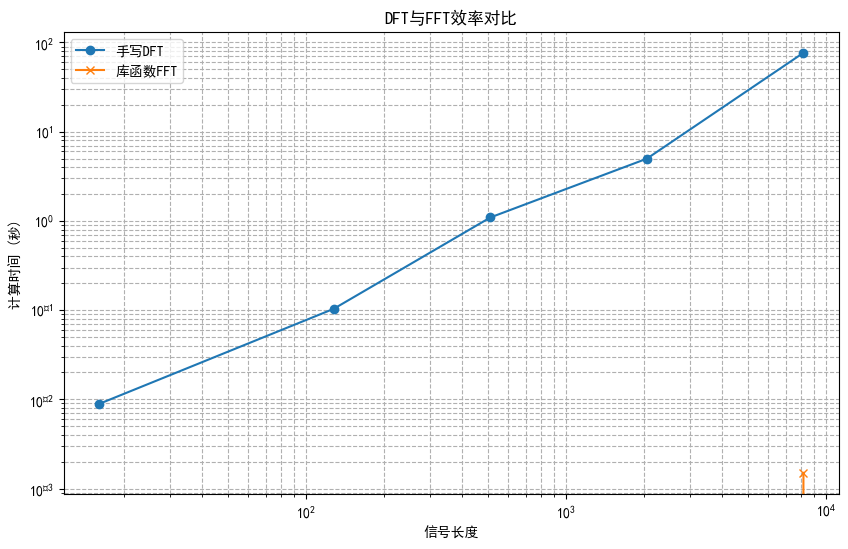

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

# 设置中文字体为 SimHei (黑体)
rcParams['font.sans-serif'] = ['SimHei']  # 支持中文字体
rcParams['axes.unicode_minus'] = False   # 解决负号 '-' 显示为方块的问题

# 生成随机信号
lengths = [16, 128, 512, 2048, 8192]
dft_times = []
fft_times = []

# 测试手写DFT和FFT
for N in lengths:
    x = np.random.random(N)

    # 测试手写DFT（假设dft是一个定义好的手写DFT函数）
    start_time = time.time()
    X_dft = dft(x)
    dft_times.append(time.time() - start_time)

    # 测试库函数FFT
    start_time = time.time()
    X_fft = np.fft.fft(x)
    fft_times.append(time.time() - start_time)

# 结果对比
print("长度\t手写DFT时间(s)\t库函数FFT时间(s)")
for i, N in enumerate(lengths):
    print(f"{N}\t{dft_times[i]:.5f}\t\t{fft_times[i]:.5f}")

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(lengths, dft_times, label='手写DFT', marker='o')
plt.plot(lengths, fft_times, label='库函数FFT', marker='x')

# 使用对数坐标轴，使得低时间差异更清晰
plt.xscale('log')
plt.yscale('log')

plt.xlabel('信号长度')
plt.ylabel('计算时间 (秒)')
plt.legend()
plt.title('DFT与FFT效率对比')
plt.grid(True, which="both", ls="--")
plt.show()


## DFT与FFT时间复杂度分析

1. **手写DFT (离散傅里叶变换)的时间复杂度：**

   手写的DFT算法是直接计算傅里叶变换的定义。对于一个长度为 $N$ 的信号，计算每个频率成分需要 $N$ 次乘法和加法，而计算总共需要 $N$ 个频率成分。因此，手写DFT的时间复杂度为：
   $$
   O(N^2)
   $$

2. **FFT (快速傅里叶变换)的时间复杂度：**

   FFT是通过分治法来优化DFT的计算。它将一个长度为 $N$ 的DFT分解成更小的DFT，从而大大降低了计算复杂度。FFT的时间复杂度为：
   $$
   O(N \log N)
   $$

3. **实验结果比较分析：**

   - 当信号的长度 $N$ 较小时，DFT的计算时间随着$N$增长而快速增长，而FFT的效率太高以至于计算时间无限接近于0。
   - 当 $N$ 很大时，DFT的计算时间显著增长，而FFT的计算时间只增加了0.0015s。
   - 实验结果与理论分析$O(N^2)$ 远远大于 $O(N \log N)$的结论相吻合，因此FFT能够显著减少计算时间，特别是在处理大规模数据时。

综上所述，随着信号长度的增加，FFT比手写DFT的效率提升非常明显，因为FFT通过优化算法减少了计算的复杂度。


## 3. 验证卷积—傅里叶变化的关系

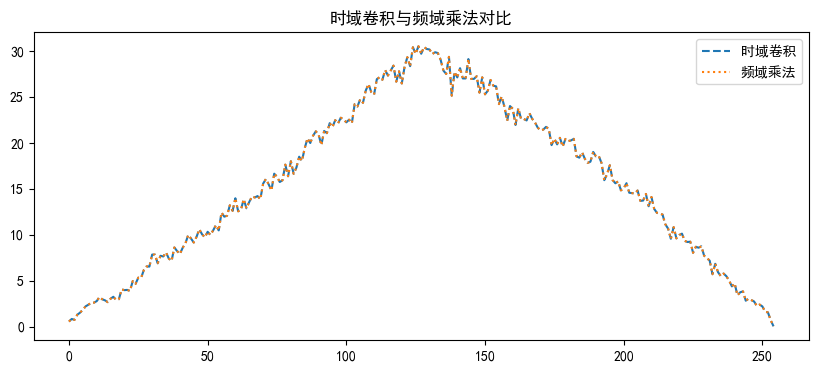

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# 定义信号与滤波器
x = np.random.random(128)  # 输入信号
h = np.random.random(128)  # 滤波器

# 为了保证频域计算的结果一致，进行零填充
N = len(x) + len(h) - 1  # 卷积结果的长度
x_pad = np.pad(x, (0, N - len(x)))  # 填充零以匹配长度
h_pad = np.pad(h, (0, N - len(h)))  # 填充零以匹配长度

# 时域卷积
conv_time = convolve(x, h, mode='full')

# 频域乘法
X = np.fft.fft(x_pad)  # 输入信号的FFT
H = np.fft.fft(h_pad)  # 滤波器的FFT
conv_freq = np.fft.ifft(X * H)  # 频域乘法并转回时域

# 由于FFT是复数结果，取实部
conv_freq_real = np.real(conv_freq)

# 比较
plt.figure(figsize=(10, 4))
plt.plot(conv_time, label='时域卷积', linestyle='--')
plt.plot(conv_freq_real, label='频域乘法', linestyle=':')
plt.legend()
plt.title('时域卷积与频域乘法对比')
plt.show()


时域的卷积等价于频域上的点乘，实验结果吻合。

## 4. 验证有限长序列的频谱分析

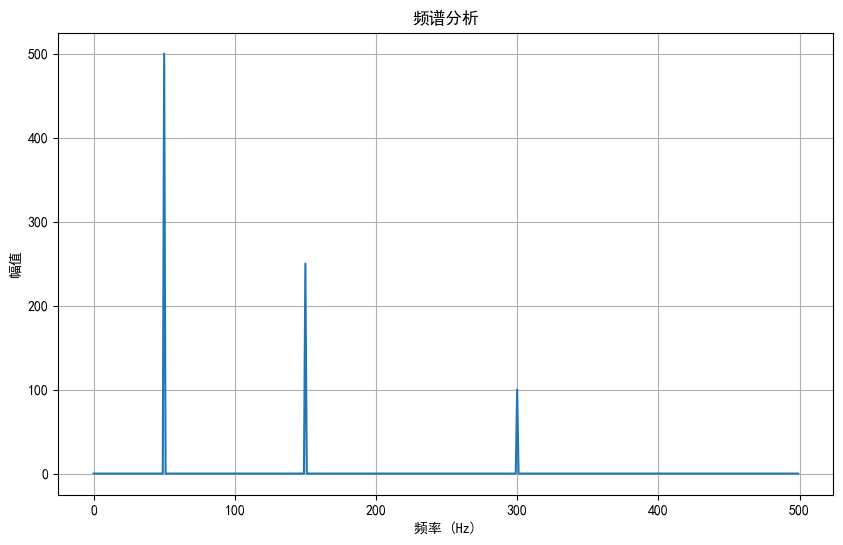

In [7]:
# 定义信号
fs = 1000  # 采样率
T = 1  # 信号持续时间
t = np.linspace(0, T, fs, endpoint=False)

# 构造多频率正弦信号
f1, f2, f3 = 50, 150, 300
x = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.2 * np.sin(2 * np.pi * f3 * t)

# 计算频谱
X = np.fft.fft(x)
frequencies = np.fft.fftfreq(len(x), 1 / fs)

# 绘制频谱
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(x)//2], np.abs(X[:len(x)//2]))
plt.title('频谱分析')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅值')
plt.grid()
plt.show()

结果分析：

频谱分析清晰地显示出正弦信号的频率分量（50Hz、150Hz、300Hz）。

实验验证傅里叶变换能够有效提取时域信号中的频率信息。